# Gradient Descent

An algorithm to find the best fit line for a given set of datapoints.

In the equation y = mx + b, it will help us to find the correct values of m (aka weights) and b (aka intercept or bias)

Step 1: Assign random values to the m and b.

Step 2: Make predictions (y\`) using the randomly initialized values of m and b.

Step 3: Calculate the loss (error) between y and y\` (using a cost function such as MAE, MSE etc) over all the data points, sum it up and calculate their average

\begin{equation}
MSE = \frac{1}{n} \sum_{i = 1}^{n}(y`_{i} - (mx_{i} + b))^{2}
\end{equation}
\begin{equation}
MAE = \frac{1}{n} \sum_{i = 1}^{n}|(y`_{i} - (mx_{i} + b))|
\end{equation}

Step 4: Update the parameters in the negative direction of the gradient (m = m - learning rate * derivative of error function w.r.t. m) <br> and (b = b - learning rate * derivative of error function w.r.t. b)
<br>
Here the learning rate can be seen as the size of the step towards the minima (too large step can skip the minima)

#### Calculating the derivatives

Derivative of the error function w.r.t. m:

\begin{equation}
\frac{\mathrm{d}MSE}{\mathrm{d}m} = -\frac{2}{n} \sum_{i = 1}^{n} x_{i} (y`_{i} - (mx_{i} + b))
\end{equation}

Derivative of the error function w.r.t. b:

\begin{equation}
\frac{\mathrm{d}MSE}{\mathrm{d}b} = -\frac{2}{n} \sum_{i = 1}^{n} (y`_{i} - (mx_{i} + b))
\end{equation}

Repeat Step 2,3 and 4 untill convergence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

## Gradient Descent for Regression

In [2]:
def MSE(y_true, y_pred):
        y_residual = y_true - y_pred
        return np.sum(np.dot(np.transpose(y_residual), y_residual)) / len (y_residual)

In [36]:
def gradient_descent(X, y, epochs = 10, learning_rate = 0.001):
    weights = np.random.rand(X.shape[1])
    bias = random.random()
    n = y.shape[0]

    for epoch in range(epochs):
        
        y_pred = np.dot(weights, np.transpose(X)) + bias
        cost = np.mean(np.square(y - y_pred)) # MSE (Mean Squared Error)\
        weights_derivative = -(2 / n) * (np.transpose(X).dot(y - y_pred))
        bias_derivative = -(2 / n) * np.sum(y - y_pred)
        
        weights = weights - learning_rate * weights_derivative
        bias = bias - learning_rate * bias_derivative
        
        if (epoch + 1) % 100 == 0: 
            print(f'Weights: {weights.values}, Bias: {bias}, Cost:{cost}, Iteration = {epoch}')
        plt.plot(np.dot(weights, np.transpose(X)) + bias, color = 'green') 
            
    plt.plot(np.dot(weights, np.transpose(X)) + bias, color = 'red')    
    plt.plot(y, linestyle = 'None', marker = 'o', color = 'black')
    return weights, bias, cost

In [17]:
df = pd.DataFrame({'x1': np.arange(1, 9, 2), 'x2': np.arange(2, 10, 2)})
df['y'] = df['x1'] * 2 + df['x2'] * 3 + 4

In [18]:
df

,x1,x2,y
0,1,2,12
1,3,4,22
2,5,6,32
3,7,8,42


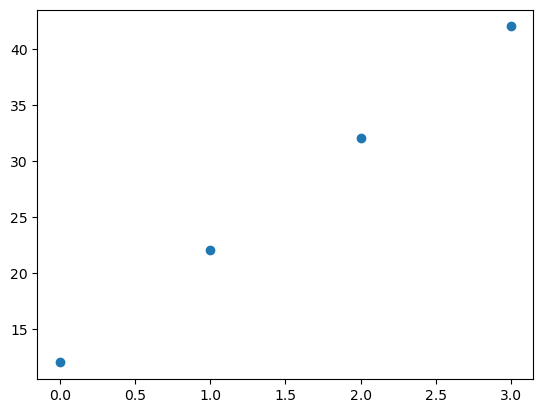

In [19]:
plt.plot(df['y'], marker = 'o', linestyle = 'None')

Weights: [2.0249512  3.31525454], Bias: 1.9568813257271354, Cost:0.7209278497424162, Iteration = 99
Weights: [1.69777618 3.50377415], Bias: 2.4725759459705836, Cost:0.25303204685078623, Iteration = 199
Weights: [1.50394573 3.61546005], Bias: 2.778092300802469, Cost:0.08880946513076732, Iteration = 299
Weights: [1.38911348 3.68162687], Bias: 2.9590913638248795, Cost:0.031170443408159502, Iteration = 399
Weights: [1.32108266 3.72082651], Bias: 3.0663218288944765, Cost:0.010940236390688803, Iteration = 499
Weights: [1.28077871 3.74404981], Bias: 3.1298490784118855, Cost:0.003839816159073902, Iteration = 599
Weights: [1.25690118 3.75780815], Bias: 3.167484944568277, Cost:0.0013477028840103288, Iteration = 699
Weights: [1.24275526 3.76595909], Bias: 3.1897818082307556, Cost:0.00047301823533344394, Iteration = 799
Weights: [1.23437469 3.770788  ], Bias: 3.2029912857838245, Cost:0.0001660204586727381, Iteration = 899


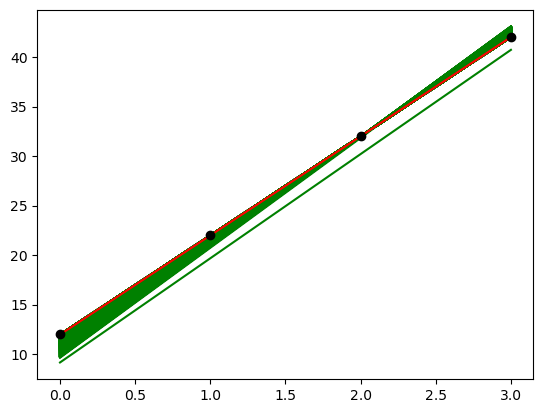

In [39]:
w, b, c = gradient_descent(df.drop('y', axis = 1), df['y'], 900, 0.009)

In [23]:
np.dot(w, np.transpose(df.drop('y', axis = 1))) + b

array([11.97759772, 21.98858224, 31.99956677, 42.0105513 ])